In [1]:
#!pip install google-api-python-client

In [2]:
import pandas as pd
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError

In [3]:
cred=pd.read_csv('ytb_key.csv')

In [4]:
cred=cred['API_KEY'].values[0]

In [5]:
API_KEY=cred

In [6]:
def get_trending_videos(api_key, max_results=200):
    try:
        # Build the YouTube service
        youtube = build('youtube', 'v3', developerKey=api_key)

        # Initialize the list to hold video details
        videos = []

        # Fetch the most popular videos
        request = youtube.videos().list(
            part='snippet,contentDetails,statistics',
            chart='mostPopular',
            regionCode='IN',  
            maxResults=50
        )

        # Paginate through the results if max_results > 50
        while request and len(videos) < max_results:
            response = request.execute()
            for item in response['items']:
                video_details = {
                    'video_id': item['id'],
                    'title': item['snippet']['title'],
                    'description': item['snippet']['description'],
                    'published_at': item['snippet']['publishedAt'],
                    'channel_id': item['snippet']['channelId'],
                    'channel_title': item['snippet']['channelTitle'],
                    'category_id': item['snippet']['categoryId'],
                    'tags': item['snippet'].get('tags', []),
                    'duration': item['contentDetails']['duration'],
                    'definition': item['contentDetails']['definition'],
                    'caption': item['contentDetails'].get('caption', 'false'),
                    'view_count': item['statistics'].get('viewCount', 0),
                    'like_count': item['statistics'].get('likeCount', 0),
                    'dislike_count': item['statistics'].get('dislikeCount', 0),
                    'favorite_count': item['statistics'].get('favoriteCount', 0),
                    'comment_count': item['statistics'].get('commentCount', 0)
                }
                videos.append(video_details)

            # Get the next page token
            request = youtube.videos().list_next(request, response)

        return videos[:max_results]
    
    except HttpError as e:
        print(f'An HTTP error {e.resp.status} occurred: {e.content}')
        return []

In [7]:
def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    return df

In [8]:
def main():
    trending_videos = get_trending_videos(API_KEY)
    if trending_videos:  # Check if any data was returned
        filename = 'trending_videos.csv'
        df=save_to_csv(trending_videos, filename)
        print(df)
        print(f'Trending videos saved to {filename}')
    else:
        print('No data to save.')

In [9]:
if __name__ == '__main__':
    main()

        video_id                                              title  \
0    77vRyWNqZjM  Chhaava | Official Trailer | Vicky K | Rashmik...   
1    _wfrNbLguWw  LOCK  (MUSIC VIDEO) SIDHU MOOSE WALA  | THE KI...   
2    fxOOCsa227o  Meem Se Mohabbat - Episode 11 [CC] 22nd Jan 20...   
3    hGOqqLjgfe4  Yerra Yerrani Rumalu Gatti Dj Full Song | 2025...   
4    XG39r3kqPAM  Samsung Galaxy S25 Series is Here - CRAZIEST A...   
..           ...                                                ...   
110  7N_d2Ln70o8  The Champions Trophy Discussion Show 🏆 | R Ash...   
111  lUcsv56UBb0  EP 1864: Saif के घर पर रात डेढ़ बजे से ढाई बजे...   
112  QxBwo6zLCj4  Kashmera Ke Khane Ne Mere Hosh Uda Diye | Bhar...   
113  0tIO8KHdCe0  Bujji Thalli Song Performance | Sudheer,Rashmi...   
114  KQW6wsiz6Z0  HUSBAND RATING MY JEWELLERY 😍 | FUNNY VLOG 😂 |...   

                                           description          published_at  \
0    Dinesh Vijan and Maddock Films present the tra...  2025-01-22T

In [10]:
trending_videos = pd.read_csv('trending_videos.csv')
print(trending_videos.head())

      video_id                                              title  \
0  77vRyWNqZjM  Chhaava | Official Trailer | Vicky K | Rashmik...   
1  _wfrNbLguWw  LOCK  (MUSIC VIDEO) SIDHU MOOSE WALA  | THE KI...   
2  fxOOCsa227o  Meem Se Mohabbat - Episode 11 [CC] 22nd Jan 20...   
3  hGOqqLjgfe4  Yerra Yerrani Rumalu Gatti Dj Full Song | 2025...   
4  XG39r3kqPAM  Samsung Galaxy S25 Series is Here - CRAZIEST A...   

                                         description          published_at  \
0  Dinesh Vijan and Maddock Films present the tra...  2025-01-22T11:45:04Z   
1  Sidhu Moose Wala Presents \n\nSong - LOCK\nSin...  2025-01-23T03:45:31Z   
2  👉 Subscribe To HUM TV - https://bit.ly/HumTvPK...  2025-01-22T16:00:47Z   
3  Yerra Yerrani Rumalu Gatti Dj Full Song | 2025...  2025-01-22T05:57:55Z   
4  Samsung ka naya S25 Ultra aagaya hai \n\n#Gala...  2025-01-22T18:03:03Z   

                 channel_id     channel_title  category_id  \
0  UC-LOdiPoxninevJ0DkleCLg     Maddock Films         

In [11]:
# check for missing values
missing_values = trending_videos.isnull().sum()

# display data types
data_types = trending_videos.dtypes

missing_values, data_types

(video_id          0
 title             0
 description       5
 published_at      0
 channel_id        0
 channel_title     0
 category_id       0
 tags              0
 duration          0
 definition        0
 caption           0
 view_count        0
 like_count        0
 dislike_count     0
 favorite_count    0
 comment_count     0
 dtype: int64,
 video_id          object
 title             object
 description       object
 published_at      object
 channel_id        object
 channel_title     object
 category_id        int64
 tags              object
 duration          object
 definition        object
 caption             bool
 view_count         int64
 like_count         int64
 dislike_count      int64
 favorite_count     int64
 comment_count      int64
 dtype: object)

In [12]:
# fill missing descriptions with "No description"
trending_videos['description'].fillna('No description', inplace=True)

C:\Users\ambik\AppData\Local\Temp\ipykernel_10016\612291233.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trending_videos['description'].fillna('No description', inplace=True)


In [13]:
# convert `published_at` to datetime
trending_videos['published_at'] = pd.to_datetime(trending_videos['published_at'])

# convert tags from string representation of list to actual list
trending_videos['tags'] = trending_videos['tags'].apply(lambda x: eval(x) if isinstance(x, str) else x)

In [14]:
# descriptive statistics
descriptive_stats = trending_videos[['view_count', 'like_count', 'dislike_count', 'comment_count']].describe()

descriptive_stats

,view_count,like_count,dislike_count,comment_count
count,1.150000e+02,1.150000e+02,115.0,115.000000
mean,2.360899e+06,7.441348e+04,0.0,4993.139130
std,4.557565e+06,1.492491e+05,0.0,20567.252673
min,7.027200e+04,0.000000e+00,0.0,0.000000
25%,3.670240e+05,6.938500e+03,0.0,246.000000
50%,7.565300e+05,1.819700e+04,0.0,646.000000
75%,2.078598e+06,6.568500e+04,0.0,3224.000000
max,2.999473e+07,1.035977e+06,0.0,211290.000000


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


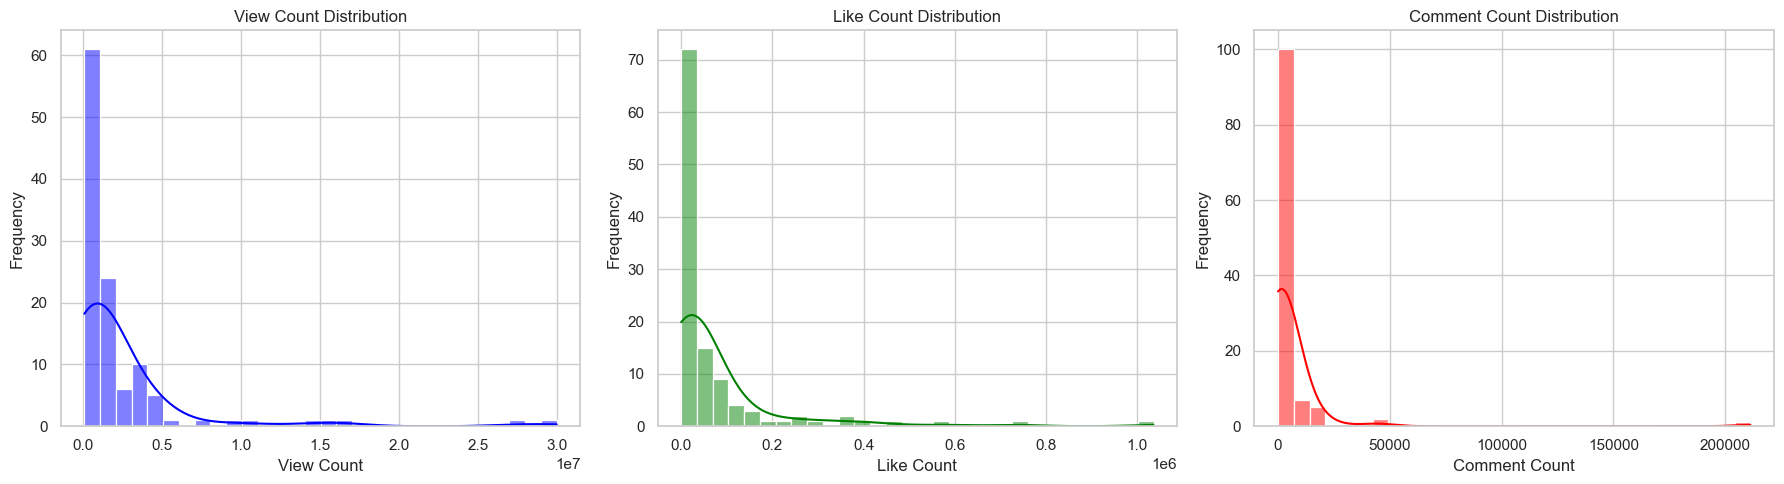

In [17]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# view count distribution
sns.histplot(trending_videos['view_count'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('View Count Distribution')
axes[0].set_xlabel('View Count')
axes[0].set_ylabel('Frequency')

# like count distribution
sns.histplot(trending_videos['like_count'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Like Count Distribution')
axes[1].set_xlabel('Like Count')
axes[1].set_ylabel('Frequency')

# comment count distribution
sns.histplot(trending_videos['comment_count'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Comment Count Distribution')
axes[2].set_xlabel('Comment Count')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()